<a href="https://colab.research.google.com/github/JackBenadon/DS440-Project/blob/main/DS440_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import datetime
from datetime import datetime, timedelta, date
import warnings
import xgboost as xgb
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso


#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
colour=['maroon','r','g','darkgreen','c','teal','b','navy','indigo','m','deeppink','orange','sienna','yellow','khaki','olive','tan','black','grey','brown']

print("Packages installed")

Packages installed


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import all files in Data folder and read into dataframes
dataframes=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Senior year/Capstone/data/archive'):
    for filename in filenames:
        file=filename.split('.')
        file=((file[0]+"_df"))
        if file !="_df":
            filepath=os.path.join(dirname,filename)
            df=pd.read_csv(filepath,sep=",",encoding = "UTF-8")
            exec(f'{file} = df.copy()')
            print(file, df.shape)
            dataframes.append(df)
print('Data imported')

appearances_df (1540638, 13)
club_games_df (133586, 11)
competitions_df (43, 10)
clubs_df (426, 17)
game_events_df (691486, 10)
game_lineups_df (2145222, 9)
player_valuations_df (465282, 5)
games_df (66793, 23)
players_df (30495, 23)
Data imported


In [4]:
path = "/content/drive/MyDrive/Senior year/Capstone/data/DS440 Master Table.csv"
master_table = pd.read_csv(path, encoding='iso-8859-1')
master_table

,Name,Nationality,Position,Team,Age,YOB,MatchedPlayed,Starts,MinutesPlayed,90s,Goals,Assists,GA,NonPenGoals,PensScored,PensAttempted,YellowCards,RedCards,xG,npxG,xAG,npxG + xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,G/90,A/90,GA/90,NonPenGoals/90,NonPenGA/90,xG/90,xAG/90,xA+xG /90,npxG/90,npXG + xAG /90,Matches,Season,Shots,ShotsOnTarget,SoT%,S/90,SoT/90,G/Shot,G/SoT,AvgShotDist,FKShots,npxG/Shot,Goals - xG,npG - npxG,PassesCompleted,PassesAttempted,PercentPassesCompleted,TotalPassingDistance,ProgressedPassingDistance,ShortPassesCompleted,ShortPassesAttempted,ShortPassesPercentCompleted,MedPassesCompleted,MedPassesAttempted,MedPassesPercentCompleted,LongPassesCompleted,LongPassesAttempted,LongPassesPercentCompleted,xA,A - xAG,KeyPasses,1/3,PPen,CPen,Progressive Passes,Tackles,TacklesWon,TklsDefThird,TklsMidThird,TklsAttThird,DribblersTackled,DribblesChallenged,DrblTkl%,ChallengesLost,Blocks,BlockedShots,BlockedPasses,Interceptions,Tackles + Interceptions,Clearances,DefensiveErrors
0,Max Aarons,eng ENG,DF,Bournemouth,24-070,2000,14,12,"1,085",12.1,0,1,1,0,0,0,1,0,0.0,0.0,0.8,0.8,19.0,40.0,22.0,0.00,0.08,0.08,0.00,0.08,0.00,0.07,0.07,0.00,0.07,Matches,2023/2024,1,0,0.0,0.08,0.00,0.00,NaN,23.9,0.0,0.02,0.0,0.0,379.0,501.0,75.6,6256.0,2424.0,186.0,213.0,87.3,156.0,202.0,77.2,31.0,56.0,55.4,0.9,0.2,7.0,22.0,12.0,2.0,40.0,28.0,18,20.0,6.0,2.0,19.0,30.0,63.3,11.0,9.0,5.0,4.0,6,34.0,23.0,0.0
1,Bénie Adama Traore,ci CIV,"FW,MF",Sheffield Utd,21-105,2002,8,3,387,4.3,0,0,0,0,0,0,0,0,0.3,0.3,0.5,0.8,7.0,9.0,14.0,0.00,0.00,0.00,0.00,0.00,0.06,0.13,0.19,0.06,0.19,Matches,2023/2024,1,1,100.0,0.23,0.23,0.00,0.00,15.3,0.0,0.27,-0.3,-0.3,55.0,71.0,77.5,775.0,185.0,34.0,38.0,89.5,19.0,23.0,82.6,1.0,1.0,100.0,0.5,-0.5,4.0,2.0,7.0,1.0,9.0,4.0,2,1.0,2.0,1.0,0.0,4.0,0.0,4.0,4.0,1.0,3.0,1,5.0,1.0,0.0
2,Tyler Adams,us USA,MF,Bournemouth,25-029,1999,1,0,20,0.2,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches,2023/2024,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,11.0,14.0,78.6,152.0,34.0,8.0,8.0,100.0,3.0,5.0,60.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,Tosin Adarabioyo,eng ENG,DF,Fulham,26-172,1997,14,12,"1,083",12.0,1,0,1,1,0,0,1,0,0.6,0.6,0.1,0.6,5.0,38.0,2.0,0.08,0.00,0.08,0.08,0.08,0.05,0.01,0.05,0.05,0.05,Matches,2023/2024,10,3,30.0,0.83,0.25,0.10,0.33,15.5,0.0,0.06,0.4,0.4,703.0,830.0,84.7,14444.0,5328.0,189.0,211.0,89.6,432.0,479.0,90.2,77.0,117.0,65.8,0.3,-0.1,1.0,28.0,2.0,0.0,38.0,16.0,10,11.0,5.0,0.0,10.0,14.0,71.4,4.0,11.0,8.0,3.0,18,34.0,60.0,0.0
4,Elijah Adebayo,eng ENG,FW,Luton Town,26-067,1998,23,13,"1,162",12.9,9,0,9,9,0,0,1,0,5.9,5.9,0.7,6.6,15.0,19.0,90.0,0.70,0.00,0.70,0.70,0.70,0.44,0.05,0.49,0.44,0.49,Matches,2023/2024,28,12,42.9,2.17,0.93,0.32,0.75,9.5,0.0,0.20,3.4,3.4,128.0,177.0,72.3,1627.0,336.0,84.0,105.0,80.0,35.0,52.0,67.3,3.0,6.0,50.0,0.4,-0.7,14.0,7.0,3.0,0.0,19.0,1.0,0,1.0,0.0,0.0,0.0,10.0,0.0,10.0,8.0,1.0,7.0,5,6.0,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,Wilfried Zaha,ci CIV,"FW,MF",Crystal Palace,26,1992,38,37,"3,280",36.4,4,3,7,4,0,0,5,0,5.2,5.2,4.0,9.1,210.0,146.0,354.0,0.11,0.08,0.19,0.11,0.19,0.14,0.11,0.25,0.14,0.25,Matches,2019/2020,61,17,27.9,1.67,0.47,0.07,0.24,16.2,0.0,0.08,-1.2,-1.2,928.0,1188.0,78.1,13537.0,3574.0,547.0,648.0,84.4,277.0,335.0,82.7,63.0,87.0,72.4,4.7,-1.0,36.0,62.0,70.0,12.0,146.0,43.0,19,18.0,12.0,13.0,12.0,49.0,24.5,37.0,22.0,2.0,20.0,18,61.0,4.0,0.0
2721,Christoph Zimmermann,de GER,DF,Norwich City,26,1993,17,16,"1,430",15.9,0,1,1,0,0,0,3,0,0.4,0.4,0.1,0.5,8.0,33.0,0.0,0.00,0.06,0.06,0.00,0.06,0.02,0.01,0.03,0.02,0.03,Matches,2019/2020,6,1,16

In [5]:
#We mainly want the value of the players, their name, and the date it was updated
merged_table = pd.merge(player_valuations_df, players_df[['player_id', 'name']], on='player_id')
merged_table

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,name
0,405973,2000-01-20,150000,3057,BE1,Fadel Gobitaka
1,405973,2016-02-07,250000,3057,BE1,Fadel Gobitaka
2,405973,2016-07-15,250000,3057,BE1,Fadel Gobitaka
3,405973,2017-01-01,150000,3057,BE1,Fadel Gobitaka
4,405973,2018-09-11,75000,3057,BE1,Fadel Gobitaka
...,...,...,...,...,...,...
465277,993081,2024-02-09,50000,924,TR1,Murat Eser
465278,988247,2024-02-10,50000,6890,TR1,Hamza Güreler
465279,720799,2024-02-12,1000000,610,NL1,Julian Rijkhoff
465280,1146029,2024-02-12,1000000,472,ES1,Juanma Herzog


In [6]:
from datetime import datetime

#this function will convert the date from when the price was updated into the season in which it was updated
def adjust_year(date_string):
    # Parse the date string into a datetime object
    date_obj = datetime.strptime(date_string, '%Y-%m-%d')

    # Define the cutoff date
    cutoff_date = datetime(date_obj.year, 6, 15)

    # Compare the date with the cutoff date
    if date_obj < cutoff_date:
        # If the date is before the cutoff date, use the previous year
        return f"{date_obj.year - 1}/{date_obj.year}"
    else:
        # If the date is on or after the cutoff date, use the current year and the next year
        return f"{date_obj.year}/{date_obj.year + 1}"

# Example usage
date_string = "2012-05-31"
adjusted_year = adjust_year(date_string)
print(adjusted_year)  # Output: 2011/2012

2011/2012


In [7]:
#Applying the function to the table
merged_table['Season'] = merged_table['date'].apply(adjust_year)
merged_table

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,name,Season
0,405973,2000-01-20,150000,3057,BE1,Fadel Gobitaka,1999/2000
1,405973,2016-02-07,250000,3057,BE1,Fadel Gobitaka,2015/2016
2,405973,2016-07-15,250000,3057,BE1,Fadel Gobitaka,2016/2017
3,405973,2017-01-01,150000,3057,BE1,Fadel Gobitaka,2016/2017
4,405973,2018-09-11,75000,3057,BE1,Fadel Gobitaka,2018/2019
...,...,...,...,...,...,...,...
465277,993081,2024-02-09,50000,924,TR1,Murat Eser,2023/2024
465278,988247,2024-02-10,50000,6890,TR1,Hamza Güreler,2023/2024
465279,720799,2024-02-12,1000000,610,NL1,Julian Rijkhoff,2023/2024
465280,1146029,2024-02-12,1000000,472,ES1,Juanma Herzog,2023/2024


In [8]:
#Renaming the columns so they match the other table in order to merge
print(merged_table.columns)
merged_table.columns = merged_table.columns.str.strip()
merged_table.rename(columns={'name': 'Name'}, inplace=True)
merged_table

Index(['player_id', 'date', 'market_value_in_eur', 'current_club_id', 'player_club_domestic_competition_id', 'name', 'Season'], dtype='object')


,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,Name,Season
0,405973,2000-01-20,150000,3057,BE1,Fadel Gobitaka,1999/2000
1,405973,2016-02-07,250000,3057,BE1,Fadel Gobitaka,2015/2016
2,405973,2016-07-15,250000,3057,BE1,Fadel Gobitaka,2016/2017
3,405973,2017-01-01,150000,3057,BE1,Fadel Gobitaka,2016/2017
4,405973,2018-09-11,75000,3057,BE1,Fadel Gobitaka,2018/2019
...,...,...,...,...,...,...,...
465277,993081,2024-02-09,50000,924,TR1,Murat Eser,2023/2024
465278,988247,2024-02-10,50000,6890,TR1,Hamza Güreler,2023/2024
465279,720799,2024-02-12,1000000,610,NL1,Julian Rijkhoff,2023/2024
465280,1146029,2024-02-12,1000000,472,ES1,Juanma Herzog,2023/2024


In [9]:
#making the merge, only keeping the entries that match player name AND year
total_table_df = pd.merge(merged_table, master_table, on=['Name', 'Season'], how='inner')

In [10]:
total_table_df

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,Name,Season,Nationality,Position,Team,Age,YOB,MatchedPlayed,Starts,MinutesPlayed,90s,Goals,Assists,GA,NonPenGoals,PensScored,PensAttempted,YellowCards,RedCards,xG,npxG,xAG,npxG + xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,G/90,A/90,GA/90,NonPenGoals/90,NonPenGA/90,xG/90,xAG/90,xA+xG /90,npxG/90,npXG + xAG /90,Matches,Shots,ShotsOnTarget,SoT%,S/90,SoT/90,G/Shot,G/SoT,AvgShotDist,FKShots,npxG/Shot,Goals - xG,npG - npxG,PassesCompleted,PassesAttempted,PercentPassesCompleted,TotalPassingDistance,ProgressedPassingDistance,ShortPassesCompleted,ShortPassesAttempted,ShortPassesPercentCompleted,MedPassesCompleted,MedPassesAttempted,MedPassesPercentCompleted,LongPassesCompleted,LongPassesAttempted,LongPassesPercentCompleted,xA,A - xAG,KeyPasses,1/3,PPen,CPen,Progressive Passes,Tackles,TacklesWon,TklsDefThird,TklsMidThird,TklsAttThird,DribblersTackled,DribblesChallenged,DrblTkl%,ChallengesLost,Blocks,BlockedShots,BlockedPasses,Interceptions,Tackles + Interceptions,Clearances,DefensiveErrors
0,3333,2019-12-10,12000000,1237,GB1,James Milner,2019/2020,eng ENG,"MF,DF",Liverpool,33,1986,22,9,937,10.4,2,2,4,0,2,2,4,0,2.2,0.6,0.7,1.3,18.0,71.0,42.0,0.19,0.19,0.38,0.00,0.19,0.21,0.07,0.28,0.06,0.13,Matches,10,2,20.0,0.96,0.19,0.00,0.00,24.5,0.0,0.06,-0.2,-0.6,682.0,804.0,84.8,11931.0,3146.0,317.0,341.0,93.0,282.0,318.0,88.7,73.0,109.0,67.0,1.1,1.3,10.0,65.0,8.0,1.0,71.0,16.0,10,3.0,10.0,3.0,6.0,26.0,23.1,20.0,12.0,3.0,9.0,7,23.0,17.0,1.0
1,3333,2020-03-09,8000000,1237,GB1,James Milner,2019/2020,eng ENG,"MF,DF",Liverpool,33,1986,22,9,937,10.4,2,2,4,0,2,2,4,0,2.2,0.6,0.7,1.3,18.0,71.0,42.0,0.19,0.19,0.38,0.00,0.19,0.21,0.07,0.28,0.06,0.13,Matches,10,2,20.0,0.96,0.19,0.00,0.00,24.5,0.0,0.06,-0.2,-0.6,682.0,804.0,84.8,11931.0,3146.0,317.0,341.0,93.0,282.0,318.0,88.7,73.0,109.0,67.0,1.1,1.3,10.0,65.0,8.0,1.0,71.0,16.0,10,3.0,10.0,3.0,6.0,26.0,23.1,20.0,12.0,3.0,9.0,7,23.0,17.0,1.0
2,3333,2020-04-08,6500000,1237,GB1,James Milner,2019/2020,eng ENG,"MF,DF",Liverpool,33,1986,22,9,937,10.4,2,2,4,0,2,2,4,0,2.2,0.6,0.7,1.3,18.0,71.0,42.0,0.19,0.19,0.38,0.00,0.19,0.21,0.07,0.28,0.06,0.13,Matches,10,2,20.0,0.96,0.19,0.00,0.00,24.5,0.0,0.06,-0.2,-0.6,682.0,804.0,84.8,11931.0,3146.0,317.0,341.0,93.0,282.0,318.0,88.7,73.0,109.0,67.0,1.1,1.3,10.0,65.0,8.0,1.0,71.0,16.0,10,3.0,10.0,3.0,6.0,26.0,23.1,20.0,12.0,3.0,9.0,7,23.0,17.0,1.0
3,3333,2020-10-13,5000000,1237,GB1,James Milner,2020/2021,eng ENG,"MF,DF",Liverpool,34,1986,26,11,"1,070",11.9,0,1,1,0,0,0,3,0,0.4,0.4,0.8,1.2,21.0,100.0,51.0,0.00,0.08,0.08,0.00,0.08,0.03,0.07,0.10,0.03,0.10,Matches,12,3,25.0,1.01,0.25,0.00,0.00,24.8,0.0,0.03,-0.4,-0.4,779.0,934.0,83.4,12265.0,3618.0,435.0,466.0,93.3,270.0,315.0,85.7,56.0,92.0,60.9,1.0,0.2,13.0,66.0,21.0,3.0,100.0,26.0,19,9.0,14.0,3.0,11.0,33.0,33.3,22.0,30.0,3.0,27.0,14,40.0,16.0,1.0
4,3333,2021-03-18,3000000,1237,GB1,James Milner,2020/2021,eng ENG,"MF,DF",Liverpool,34,1986,26,11,"1,070",11.9,0,1,1,0,0,0,3,0,0.4,0.4,0.8,1.2,21.0,100.0,51.0,0.00,0.08,0.08,0.00,0.08,0.03,0.07,0.10,0.03,0.10,Matches,12,3,25.0,1.01,0.25,0.00,0.00,24.8,0.0,0.03,-0.4,-0.4,779.0,934.0,83.4,12265.0,3618.0,435.0,466.0,93.3,270.0,315.0,85.7,56.0,92.0,60.9,1.0,0.2,13.0,66.0,21.0,3.0,100.0,26.0,19,9.0,14.0,3.0,11.0,33.0,33.3,22.0,30.0,3.0,27.0,14,40.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,867688,2023-12-19,7000000,1237,GB1,Jack Hinshelwood,2023/2024,eng ENG,DF,Brighton,18-338,2005,12,8,869,9.7,3,0,3,3,0,0,1,0,1.9,1.9,0.7,2.5,16.0,19.0,38.0,0.31,0.00,0.31,0.31,0.31,0.19,0.07,0.26,0.19,0.26,Matches,14,8,57.1,1.45,0.83,0.21,0.38,9.2,0.0,0.14,1.1,1.1,4

In [11]:
#replacing the NaN values with 0 in the player stats df
total_table_df.fillna(0, inplace=True)
total_table_df

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,Name,Season,Nationality,Position,Team,Age,YOB,MatchedPlayed,Starts,MinutesPlayed,90s,Goals,Assists,GA,NonPenGoals,PensScored,PensAttempted,YellowCards,RedCards,xG,npxG,xAG,npxG + xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,G/90,A/90,GA/90,NonPenGoals/90,NonPenGA/90,xG/90,xAG/90,xA+xG /90,npxG/90,npXG + xAG /90,Matches,Shots,ShotsOnTarget,SoT%,S/90,SoT/90,G/Shot,G/SoT,AvgShotDist,FKShots,npxG/Shot,Goals - xG,npG - npxG,PassesCompleted,PassesAttempted,PercentPassesCompleted,TotalPassingDistance,ProgressedPassingDistance,ShortPassesCompleted,ShortPassesAttempted,ShortPassesPercentCompleted,MedPassesCompleted,MedPassesAttempted,MedPassesPercentCompleted,LongPassesCompleted,LongPassesAttempted,LongPassesPercentCompleted,xA,A - xAG,KeyPasses,1/3,PPen,CPen,Progressive Passes,Tackles,TacklesWon,TklsDefThird,TklsMidThird,TklsAttThird,DribblersTackled,DribblesChallenged,DrblTkl%,ChallengesLost,Blocks,BlockedShots,BlockedPasses,Interceptions,Tackles + Interceptions,Clearances,DefensiveErrors
0,3333,2019-12-10,12000000,1237,GB1,James Milner,2019/2020,eng ENG,"MF,DF",Liverpool,33,1986,22,9,937,10.4,2,2,4,0,2,2,4,0,2.2,0.6,0.7,1.3,18.0,71.0,42.0,0.19,0.19,0.38,0.00,0.19,0.21,0.07,0.28,0.06,0.13,Matches,10,2,20.0,0.96,0.19,0.00,0.00,24.5,0.0,0.06,-0.2,-0.6,682.0,804.0,84.8,11931.0,3146.0,317.0,341.0,93.0,282.0,318.0,88.7,73.0,109.0,67.0,1.1,1.3,10.0,65.0,8.0,1.0,71.0,16.0,10,3.0,10.0,3.0,6.0,26.0,23.1,20.0,12.0,3.0,9.0,7,23.0,17.0,1.0
1,3333,2020-03-09,8000000,1237,GB1,James Milner,2019/2020,eng ENG,"MF,DF",Liverpool,33,1986,22,9,937,10.4,2,2,4,0,2,2,4,0,2.2,0.6,0.7,1.3,18.0,71.0,42.0,0.19,0.19,0.38,0.00,0.19,0.21,0.07,0.28,0.06,0.13,Matches,10,2,20.0,0.96,0.19,0.00,0.00,24.5,0.0,0.06,-0.2,-0.6,682.0,804.0,84.8,11931.0,3146.0,317.0,341.0,93.0,282.0,318.0,88.7,73.0,109.0,67.0,1.1,1.3,10.0,65.0,8.0,1.0,71.0,16.0,10,3.0,10.0,3.0,6.0,26.0,23.1,20.0,12.0,3.0,9.0,7,23.0,17.0,1.0
2,3333,2020-04-08,6500000,1237,GB1,James Milner,2019/2020,eng ENG,"MF,DF",Liverpool,33,1986,22,9,937,10.4,2,2,4,0,2,2,4,0,2.2,0.6,0.7,1.3,18.0,71.0,42.0,0.19,0.19,0.38,0.00,0.19,0.21,0.07,0.28,0.06,0.13,Matches,10,2,20.0,0.96,0.19,0.00,0.00,24.5,0.0,0.06,-0.2,-0.6,682.0,804.0,84.8,11931.0,3146.0,317.0,341.0,93.0,282.0,318.0,88.7,73.0,109.0,67.0,1.1,1.3,10.0,65.0,8.0,1.0,71.0,16.0,10,3.0,10.0,3.0,6.0,26.0,23.1,20.0,12.0,3.0,9.0,7,23.0,17.0,1.0
3,3333,2020-10-13,5000000,1237,GB1,James Milner,2020/2021,eng ENG,"MF,DF",Liverpool,34,1986,26,11,"1,070",11.9,0,1,1,0,0,0,3,0,0.4,0.4,0.8,1.2,21.0,100.0,51.0,0.00,0.08,0.08,0.00,0.08,0.03,0.07,0.10,0.03,0.10,Matches,12,3,25.0,1.01,0.25,0.00,0.00,24.8,0.0,0.03,-0.4,-0.4,779.0,934.0,83.4,12265.0,3618.0,435.0,466.0,93.3,270.0,315.0,85.7,56.0,92.0,60.9,1.0,0.2,13.0,66.0,21.0,3.0,100.0,26.0,19,9.0,14.0,3.0,11.0,33.0,33.3,22.0,30.0,3.0,27.0,14,40.0,16.0,1.0
4,3333,2021-03-18,3000000,1237,GB1,James Milner,2020/2021,eng ENG,"MF,DF",Liverpool,34,1986,26,11,"1,070",11.9,0,1,1,0,0,0,3,0,0.4,0.4,0.8,1.2,21.0,100.0,51.0,0.00,0.08,0.08,0.00,0.08,0.03,0.07,0.10,0.03,0.10,Matches,12,3,25.0,1.01,0.25,0.00,0.00,24.8,0.0,0.03,-0.4,-0.4,779.0,934.0,83.4,12265.0,3618.0,435.0,466.0,93.3,270.0,315.0,85.7,56.0,92.0,60.9,1.0,0.2,13.0,66.0,21.0,3.0,100.0,26.0,19,9.0,14.0,3.0,11.0,33.0,33.3,22.0,30.0,3.0,27.0,14,40.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,867688,2023-12-19,7000000,1237,GB1,Jack Hinshelwood,2023/2024,eng ENG,DF,Brighton,18-338,2005,12,8,869,9.7,3,0,3,3,0,0,1,0,1.9,1.9,0.7,2.5,16.0,19.0,38.0,0.31,0.00,0.31,0.31,0.31,0.19,0.07,0.26,0.19,0.26,Matches,14,8,57.1,1.45,0.83,0.21,0.38,9.2,0.0,0.14,1.1,1.1,4

###We need to remove all of the other entries that are same player, same year, same stats, **different** market value.
(We are going to keep the last available mkt value for that season.)

In [12]:
# Convert 'date' column to datetime if it's not already in datetime format
total_table_df['date'] = pd.to_datetime(total_table_df['date'])

# Sort the DataFrame by 'date' column in ascending order
total_table_df = total_table_df.sort_values(by='date')

# Group by 'name' and 'season', and keep the row with the oldest date value within each group
total_table_df = total_table_df.groupby(['Name', 'Season']).last().reset_index()

Cleaning the goalkeeper dataset for future use.

In [13]:
path = "/content/drive/MyDrive/Senior year/Capstone/data/GK Master Table.csv"
gkstats = pd.read_csv(path, encoding='iso-8859-1')
gkstats

,Name,Nationality,Pos,Team,Age,YOB,MatchedPlayed,Starts,MinutesPlayed,90s,GoalsAgainst,GoalsAgainst/90,SotAgainst,Saves,SavePercentage,Wins,Draws,Losses,CleanSheets,CleanSheetPercent,PensAttempted,PensAllowed,PensSaved,PensMissed,PenSavePercent,Matches,Season
0,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%,Matches,2023/2024
1,Alisson,br BRA,GK,Liverpool,31-164,1992,21,21,"1,890",21.0,19,0.90,73,55,75.3,13,6,2,7,33.3,1,1,0,0,0.0,Matches,2023/2024
2,Alphonse Areola,fr FRA,GK,West Ham,31-016,1993,25,25,"2,204",24.5,40,1.63,144,104,75.0,10,7,8,4,16.0,6,4,2,0,33.3,Matches,2023/2024
3,Daniel Bentley,eng ENG,GK,Wolves,30-245,1993,4,2,293,3.3,4,1.23,12,8,66.7,1,0,1,1,50.0,0,0,0,0,NaN,Matches,2023/2024
4,Martin Dúbravka,sk SVK,GK,Newcastle Utd,35-059,1989,14,13,"1,175",13.1,30,2.30,89,58,69.7,4,2,7,3,23.1,4,3,1,0,25.0,Matches,2023/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Roberto,es ESP,GK,West Ham,33,1986,8,7,687,7.6,17,2.23,51,35,68.6,0,1,6,0,0.0,1,1,0,0,0.0,Matches,2019/2020
203,Mathew Ryan,au AUS,GK,Brighton,27,1992,38,38,"3,420",38.0,54,1.42,168,116,69.0,9,14,15,9,23.7,2,2,0,0,0.0,Matches,2019/2020
204,Kasper Schmeichel,dk DEN,GK,Leicester City,32,1986,38,38,"3,420",38.0,41,1.08,135,94,75.6,18,8,12,13,34.2,10,8,2,0,20.0,Matches,2019/2020
205,Jed Steer,eng ENG,GK,Aston Villa,26,1992,1,1,7,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,2019/2020


In [14]:
#replacing the NaN values with 0 in the gk stats df
gkstats.fillna(0, inplace=True)
gkstats

,Name,Nationality,Pos,Team,Age,YOB,MatchedPlayed,Starts,MinutesPlayed,90s,GoalsAgainst,GoalsAgainst/90,SotAgainst,Saves,SavePercentage,Wins,Draws,Losses,CleanSheets,CleanSheetPercent,PensAttempted,PensAllowed,PensSaved,PensMissed,PenSavePercent,Matches,Season
0,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%,Matches,2023/2024
1,Alisson,br BRA,GK,Liverpool,31-164,1992,21,21,"1,890",21.0,19,0.90,73,55,75.3,13,6,2,7,33.3,1,1,0,0,0.0,Matches,2023/2024
2,Alphonse Areola,fr FRA,GK,West Ham,31-016,1993,25,25,"2,204",24.5,40,1.63,144,104,75.0,10,7,8,4,16.0,6,4,2,0,33.3,Matches,2023/2024
3,Daniel Bentley,eng ENG,GK,Wolves,30-245,1993,4,2,293,3.3,4,1.23,12,8,66.7,1,0,1,1,50.0,0,0,0,0,0,Matches,2023/2024
4,Martin Dúbravka,sk SVK,GK,Newcastle Utd,35-059,1989,14,13,"1,175",13.1,30,2.30,89,58,69.7,4,2,7,3,23.1,4,3,1,0,25.0,Matches,2023/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Roberto,es ESP,GK,West Ham,33,1986,8,7,687,7.6,17,2.23,51,35,68.6,0,1,6,0,0.0,1,1,0,0,0.0,Matches,2019/2020
203,Mathew Ryan,au AUS,GK,Brighton,27,1992,38,38,"3,420",38.0,54,1.42,168,116,69.0,9,14,15,9,23.7,2,2,0,0,0.0,Matches,2019/2020
204,Kasper Schmeichel,dk DEN,GK,Leicester City,32,1986,38,38,"3,420",38.0,41,1.08,135,94,75.6,18,8,12,13,34.2,10,8,2,0,20.0,Matches,2019/2020
205,Jed Steer,eng ENG,GK,Aston Villa,26,1992,1,1,7,0.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Matches,2019/2020


In [15]:
keeper_df = pd.merge(merged_table, gkstats, on=['Name', 'Season'], how='inner')
keeper_df

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,Name,Season,Nationality,Pos,Team,Age,YOB,MatchedPlayed,Starts,MinutesPlayed,90s,GoalsAgainst,GoalsAgainst/90,SotAgainst,Saves,SavePercentage,Wins,Draws,Losses,CleanSheets,CleanSheetPercent,PensAttempted,PensAllowed,PensSaved,PensMissed,PenSavePercent,Matches
0,13572,2019-12-10,1500000,1010,GB1,Ben Foster,2019/2020,eng ENG,GK,Watford,36,1983,38,38,"3,420",38.0,64,1.68,178,116,68.5,8,10,20,9,23.7,9,8,1,0,11.1,Matches
1,13572,2020-04-08,1200000,1010,GB1,Ben Foster,2019/2020,eng ENG,GK,Watford,36,1983,38,38,"3,420",38.0,64,1.68,178,116,68.5,8,10,20,9,23.7,9,8,1,0,11.1,Matches
2,13572,2021-06-30,300000,1010,GB1,Ben Foster,2021/2022,eng ENG,GK,Watford,38,1983,26,26,"2,340",26.0,49,1.88,116,67,60.3,5,5,16,4,15.4,4,3,1,0,25.0,Matches
3,13572,2021-12-23,300000,1010,GB1,Ben Foster,2021/2022,eng ENG,GK,Watford,38,1983,26,26,"2,340",26.0,49,1.88,116,67,60.3,5,5,16,4,15.4,4,3,1,0,25.0,Matches
4,14555,2020-10-13,800000,281,GB1,Scott Carson,2020/2021,eng ENG,GK,Manchester City,34,1985,1,1,90,1.0,3,3.00,5,1,60.0,1,0,0,0,0.0,2,1,1,0,50.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,585550,2022-09-15,15000000,180,GB1,Gavin Bazunu,2022/2023,ie IRL,GK,Southampton,20,2002,32,32,"2,880",32.0,56,1.75,120,67,54.2,6,6,20,4,12.5,2,1,1,0,50.0,Matches
480,585550,2022-11-03,15000000,180,GB1,Gavin Bazunu,2022/2023,ie IRL,GK,Southampton,20,2002,32,32,"2,880",32.0,56,1.75,120,67,54.2,6,6,20,4,12.5,2,1,1,0,50.0,Matches
481,585550,2023-03-16,18000000,180,GB1,Gavin Bazunu,2022/2023,ie IRL,GK,Southampton,20,2002,32,32,"2,880",32.0,56,1.75,120,67,54.2,6,6,20,4,12.5,2,1,1,0,50.0,Matches
482,566799,2023-07-12,15000000,1132,GB1,James Trafford,2023/2024,eng ENG,GK,Burnley,21-156,2002,28,28,"2,520",28.0,62,2.21,166,106,65.7,3,5,20,2,7.1,5,5,0,0,0.0,Matches


In [16]:
import copy
total_table_two_df = total_table_df.copy()

In [17]:
total_table_df.drop(columns = ['current_club_id'], inplace = True)

In [18]:
total_table_df.drop(columns = ['Matches'], inplace = True)

In [19]:
total_table_df.drop(columns = ['Name'], inplace = True)

In [20]:
total_table_df.drop(columns = ['date'], inplace = True)

In [21]:
total_table_df.drop(columns = ['player_club_domestic_competition_id'], inplace = True)

In [22]:
# Splitting the age column on '-' and extracting the first part
total_table_df['Age'] = total_table_df['Age'].str.split('-').str[0]

# Converting the age column to integer type
total_table_df['Age'] = total_table_df['Age'].astype(int)

In [23]:
#Removes commas for minutes played
def convert_to_numeric(value):
    if isinstance(value, str):
        return int(value.replace(",", ""))  # Assuming values are integers
    else:
        return value

total_table_df['MinutesPlayed'] = total_table_df['MinutesPlayed'].apply(convert_to_numeric)

In [24]:
column_names = total_table_df.columns.tolist()
print(column_names)

['Season', 'player_id', 'market_value_in_eur', 'Nationality', 'Position', 'Team', 'Age', 'YOB', 'MatchedPlayed', 'Starts', 'MinutesPlayed', '90s', 'Goals', 'Assists', 'GA', 'NonPenGoals', 'PensScored', 'PensAttempted', 'YellowCards', 'RedCards', 'xG', 'npxG', 'xAG', 'npxG + xAG', 'ProgressiveCarries', 'ProgressivePasses', 'ProgressivePassesReceived', 'G/90', 'A/90', 'GA/90', 'NonPenGoals/90', 'NonPenGA/90', 'xG/90', 'xAG/90', 'xA+xG /90', 'npxG/90', 'npXG + xAG /90', 'Shots', 'ShotsOnTarget', 'SoT%', 'S/90', 'SoT/90', 'G/Shot', 'G/SoT', 'AvgShotDist', 'FKShots', 'npxG/Shot', 'Goals - xG', 'npG - npxG', 'PassesCompleted', 'PassesAttempted', 'PercentPassesCompleted', 'TotalPassingDistance', 'ProgressedPassingDistance', 'ShortPassesCompleted', 'ShortPassesAttempted', 'ShortPassesPercentCompleted', 'MedPassesCompleted', 'MedPassesAttempted', 'MedPassesPercentCompleted', 'LongPassesCompleted', 'LongPassesAttempted', 'LongPassesPercentCompleted', 'xA', 'A - xAG', 'KeyPasses', '1/3', 'PPen', 

In [25]:
chosen_column = 'Nationality'

# Create a dictionary to map unique values to unique identifiers
unique_values = total_table_df[chosen_column].unique()
id_mapping = {value: idx for idx, value in enumerate(unique_values, start=1)}

# Create a new column in the DataFrame to store the primary IDs
total_table_df['nationality_id'] = total_table_df[chosen_column].map(id_mapping)

# Adding the id to the copy df so we can merge them when its time to make the front end
total_table_two_df['nationality_id'] = total_table_df['nationality_id']

In [26]:
# Now repeating the process for our other features
# Team
chosen_column = 'Team'

# Create a dictionary to map unique values to unique identifiers
unique_values = total_table_df[chosen_column].unique()
id_mapping = {value: idx for idx, value in enumerate(unique_values, start=1)}

# Create a new column in the DataFrame to store the primary IDs
total_table_df['team_id'] = total_table_df[chosen_column].map(id_mapping)

# Adding the id to the copy df so we can merge them when its time to make the front end
total_table_two_df['team_id'] = total_table_df['team_id']

In [27]:
# Repeating for position
chosen_column = 'Position'

# Create a dictionary to map unique values to unique identifiers
unique_values = total_table_df[chosen_column].unique()
id_mapping = {value: idx for idx, value in enumerate(unique_values, start=1)}

# Create a new column in the DataFrame to store the primary IDs
total_table_df['position_id'] = total_table_df[chosen_column].map(id_mapping)

# Adding the id to the copy df so we can merge them when its time to make the front end
total_table_two_df['position_id'] = total_table_df['position_id']

In [28]:
# Repeating for season
chosen_column = 'Season'

# Create a dictionary to map unique values to unique identifiers
unique_values = total_table_df[chosen_column].unique()
id_mapping = {value: idx for idx, value in enumerate(unique_values, start=1)}

# Create a new column in the DataFrame to store the primary IDs
total_table_df['season_id'] = total_table_df[chosen_column].map(id_mapping)

# Adding the id to the copy df so we can merge them when its time to make the front end
total_table_two_df['season_id'] = total_table_df['season_id']

In [29]:
#Removing all of the categorical features now that we have the ID
total_table_df.drop(columns = ['Season'], inplace = True)
total_table_df.drop(columns = ['Position'], inplace = True)
total_table_df.drop(columns = ['Team'], inplace = True)
total_table_df.drop(columns = ['Nationality'], inplace = True)

In [30]:
column_names = total_table_df.columns.tolist()
print(column_names)

['player_id', 'market_value_in_eur', 'Age', 'YOB', 'MatchedPlayed', 'Starts', 'MinutesPlayed', '90s', 'Goals', 'Assists', 'GA', 'NonPenGoals', 'PensScored', 'PensAttempted', 'YellowCards', 'RedCards', 'xG', 'npxG', 'xAG', 'npxG + xAG', 'ProgressiveCarries', 'ProgressivePasses', 'ProgressivePassesReceived', 'G/90', 'A/90', 'GA/90', 'NonPenGoals/90', 'NonPenGA/90', 'xG/90', 'xAG/90', 'xA+xG /90', 'npxG/90', 'npXG + xAG /90', 'Shots', 'ShotsOnTarget', 'SoT%', 'S/90', 'SoT/90', 'G/Shot', 'G/SoT', 'AvgShotDist', 'FKShots', 'npxG/Shot', 'Goals - xG', 'npG - npxG', 'PassesCompleted', 'PassesAttempted', 'PercentPassesCompleted', 'TotalPassingDistance', 'ProgressedPassingDistance', 'ShortPassesCompleted', 'ShortPassesAttempted', 'ShortPassesPercentCompleted', 'MedPassesCompleted', 'MedPassesAttempted', 'MedPassesPercentCompleted', 'LongPassesCompleted', 'LongPassesAttempted', 'LongPassesPercentCompleted', 'xA', 'A - xAG', 'KeyPasses', '1/3', 'PPen', 'CPen', 'Progressive Passes', 'Tackles', 'Tac

###**machine learning shouldnt apply to player ids**

In [31]:
# This part of the code will drop the player_id column.
#We think this feature is ruining the performance of the model.

total_table_df.drop(columns = ['player_id', 'YOB'], inplace = True)


In [32]:
total_table_df

,market_value_in_eur,Age,MatchedPlayed,Starts,MinutesPlayed,90s,Goals,Assists,GA,NonPenGoals,PensScored,PensAttempted,YellowCards,RedCards,xG,npxG,xAG,npxG + xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,G/90,A/90,GA/90,NonPenGoals/90,NonPenGA/90,xG/90,xAG/90,xA+xG /90,npxG/90,npXG + xAG /90,Shots,ShotsOnTarget,SoT%,S/90,SoT/90,G/Shot,G/SoT,AvgShotDist,FKShots,npxG/Shot,Goals - xG,npG - npxG,PassesCompleted,PassesAttempted,PercentPassesCompleted,TotalPassingDistance,ProgressedPassingDistance,ShortPassesCompleted,ShortPassesAttempted,ShortPassesPercentCompleted,MedPassesCompleted,MedPassesAttempted,MedPassesPercentCompleted,LongPassesCompleted,LongPassesAttempted,LongPassesPercentCompleted,xA,A - xAG,KeyPasses,1/3,PPen,CPen,Progressive Passes,Tackles,TacklesWon,TklsDefThird,TklsMidThird,TklsAttThird,DribblersTackled,DribblesChallenged,DrblTkl%,ChallengesLost,Blocks,BlockedShots,BlockedPasses,Interceptions,Tackles + Interceptions,Clearances,DefensiveErrors,nationality_id,team_id,position_id,season_id
0,4000000,19,24,14,1258,14.0,3,1,4,3,0,0,0,0,4.0,4.0,0.5,4.5,21.0,10.0,86.0,0.21,0.07,0.29,0.21,0.29,0.28,0.04,0.32,0.28,0.32,38,13,34.2,2.72,0.93,0.08,0.23,16.2,0.0,0.11,-1.0,-1.0,113.0,155.0,72.9,1387.0,183.0,66.0,83.0,79.5,30.0,40.0,75.0,2.0,2.0,100.0,0.4,0.5,6.0,9.0,2.0,0.0,10.0,7.0,6,1.0,4.0,2.0,3.0,10.0,30.0,7.0,11.0,0.0,11.0,0,7.0,3.0,0.0,1,1,1,1
1,7000000,20,17,9,791,8.8,2,1,3,2,0,0,0,0,4.0,4.0,0.2,4.2,12.0,4.0,58.0,0.23,0.11,0.34,0.23,0.34,0.45,0.02,0.48,0.45,0.48,23,8,34.8,2.62,0.91,0.09,0.25,14.0,0.0,0.17,-2.0,-2.0,72.0,94.0,76.6,844.0,176.0,51.0,65.0,78.5,14.0,16.0,87.5,0.0,1.0,0.0,0.1,0.8,6.0,3.0,1.0,0.0,4.0,6.0,3,1.0,3.0,2.0,0.0,2.0,0.0,2.0,4.0,0.0,4.0,0,6.0,2.0,0.0,1,1,1,2
2,6000000,21,4,1,156,1.7,0,0,0,0,0,0,0,0,0.4,0.4,0.1,0.5,3.0,1.0,7.0,0.00,0.00,0.00,0.00,0.00,0.21,0.06,0.26,0.21,0.26,2,0,0.0,1.15,0.00,0.00,0.00,15.5,0.0,0.18,-0.4,-0.4,14.0,19.0,73.7,172.0,16.0,8.0,8.0,100.0,5.0,5.0,100.0,0.0,1.0,0.0,0.1,-0.1,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,0,0.0,0.0,0.0,1,1,2,3
3,6500000,29,31,31,2727,30.3,3,0,3,3,0,0,7,0,1.4,1.4,3.2,4.5,43.0,166.0,97.0,0.10,0.00,0.10,0.10,0.10,0.05,0.11,0.15,0.05,0.15,17,5,29.4,0.56,0.17,0.18,0.60,21.7,7.0,0.08,1.6,1.6,1232.0,1705.0,72.3,20084.0,9913.0,676.0,753.0,89.8,425.0,597.0,71.2,110.0,256.0,43.0,2.2,-3.2,26.0,135.0,21.0,17.0,166.0,43.0,26,21.0,18.0,4.0,23.0,46.0,50.0,23.0,33.0,10.0,23.0,35,78.0,75.0,2.0,2,2,3,1
4,5000000,30,36,36,3170,35.2,0,8,8,0,0,0,3,0,1.0,1.0,6.5,7.5,35.0,162.0,96.0,0.00,0.23,0.23,0.00,0.23,0.03,0.18,0.21,0.03,0.21,19,4,21.1,0.54,0.11,0.00,0.00,25.4,11.0,0.05,-1.0,-1.0,1586.0,2141.0,74.1,28632.0,13845.0,754.0,847.0,89.0,606.0,755.0,80.3,198.0,429.0,46.2,5.0,1.5,58.0,174.0,26.0,18.0,162.0,32.0,13,15.0,15.0,2.0,18.0,32.0,56.3,14.0,29.0,14.0,15.0,32,64.0,79.0,2.0,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,20000000,29,19,14,1329,14.8,0,3,3,0,0,0,3,0,0.6,0.6,3.0,3.7,65.0,37.0,122.0,0.00,0.20,0.20,0.00,0.20,0.04,0.21,0.25,0.04,0.25,13,3,23.1,0.88,0.20,0.00,0.00,18.4,0.0,0.05,-0.6,-0.6,581.0,745.0,78.0,8535.0,2588.0,319.0,373.0,85.5,217.0,267.0,81.3,24.0,42.0,57.1,2.6,0.0,22.0,15.0,30.0,14.0,37.0,23.0,14,15.0,5.0,3.0,13.0,36.0,36.1,23.0,18.0,3.0,15.0,7,30.0,37.0,2.0,8,19,3,4
2390,10000000,30,15,9,874,9.7,2,0,2,2,0,0,2,0,1.1,1.1,1.1,2.2,28.0,18.0,72.0,0.21,0.00,0.21,0.21,0.21,0.11,0.12,0.23,0.11,0.23,7,4,57.1,0.72,0.41,0.29,0.50,11.9,0.0,0.16,0.9,0.9,368.0,462.0,79.7,5445.0,1378.0,210.0,236.0,89.0,140.0,175.0,80.0,13.0,22.0,59.1,1.0,-1.1,11.0,8.0,11.0,2.0,18.0,15.0,11,15.0,0.0,0.0,9.0,15.0,60.0,6.0,7.0,2.0,5.0,11,26.0,31.0,0.0,8,19,3,5
2391,100000,23,12,12,1080,12.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.

###**I need to normalize or delete the varibles whose numbers are in the 1000s** *(except for the target variable)*

In [33]:
columns_to_normalize = ['MinutesPlayed', 'TotalPassingDistance', 'ProgressedPassingDistance']

# Extract the columns you want to normalize
X_to_normalize = total_table_df[columns_to_normalize]

# Define the range for normalization
min_value = 0
max_value = 1  # You can adjust these values as needed

# Perform min-max normalization
X_normalized = (X_to_normalize - X_to_normalize.min()) / (X_to_normalize.max() - X_to_normalize.min()) * (max_value - min_value) + min_value

# Add the normalized columns back to the original dataset
X_normalized.columns = [col + '_normalized' for col in columns_to_normalize]
total_table_df = pd.concat([total_table_df, X_normalized], axis=1)

# Drop the original columns
total_table_df.drop(columns_to_normalize, axis=1, inplace=True)

In [34]:
total_table_df

,market_value_in_eur,Age,MatchedPlayed,Starts,90s,Goals,Assists,GA,NonPenGoals,PensScored,PensAttempted,YellowCards,RedCards,xG,npxG,xAG,npxG + xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,G/90,A/90,GA/90,NonPenGoals/90,NonPenGA/90,xG/90,xAG/90,xA+xG /90,npxG/90,npXG + xAG /90,Shots,ShotsOnTarget,SoT%,S/90,SoT/90,G/Shot,G/SoT,AvgShotDist,FKShots,npxG/Shot,Goals - xG,npG - npxG,PassesCompleted,PassesAttempted,PercentPassesCompleted,ShortPassesCompleted,ShortPassesAttempted,ShortPassesPercentCompleted,MedPassesCompleted,MedPassesAttempted,MedPassesPercentCompleted,LongPassesCompleted,LongPassesAttempted,LongPassesPercentCompleted,xA,A - xAG,KeyPasses,1/3,PPen,CPen,Progressive Passes,Tackles,TacklesWon,TklsDefThird,TklsMidThird,TklsAttThird,DribblersTackled,DribblesChallenged,DrblTkl%,ChallengesLost,Blocks,BlockedShots,BlockedPasses,Interceptions,Tackles + Interceptions,Clearances,DefensiveErrors,nationality_id,team_id,position_id,season_id,MinutesPlayed_normalized,TotalPassingDistance_normalized,ProgressedPassingDistance_normalized
0,4000000,19,24,14,14.0,3,1,4,3,0,0,0,0,4.0,4.0,0.5,4.5,21.0,10.0,86.0,0.21,0.07,0.29,0.21,0.29,0.28,0.04,0.32,0.28,0.32,38,13,34.2,2.72,0.93,0.08,0.23,16.2,0.0,0.11,-1.0,-1.0,113.0,155.0,72.9,66.0,83.0,79.5,30.0,40.0,75.0,2.0,2.0,100.0,0.4,0.5,6.0,9.0,2.0,0.0,10.0,7.0,6,1.0,4.0,2.0,3.0,10.0,30.0,7.0,11.0,0.0,11.0,0,7.0,3.0,0.0,1,1,1,1,0.367651,0.023766,0.006789
1,7000000,20,17,9,8.8,2,1,3,2,0,0,0,0,4.0,4.0,0.2,4.2,12.0,4.0,58.0,0.23,0.11,0.34,0.23,0.34,0.45,0.02,0.48,0.45,0.48,23,8,34.8,2.62,0.91,0.09,0.25,14.0,0.0,0.17,-2.0,-2.0,72.0,94.0,76.6,51.0,65.0,78.5,14.0,16.0,87.5,0.0,1.0,0.0,0.1,0.8,6.0,3.0,1.0,0.0,4.0,6.0,3,1.0,3.0,2.0,0.0,2.0,0.0,2.0,4.0,0.0,4.0,0,6.0,2.0,0.0,1,1,1,2,0.231062,0.014462,0.006530
2,6000000,21,4,1,1.7,0,0,0,0,0,0,0,0,0.4,0.4,0.1,0.5,3.0,1.0,7.0,0.00,0.00,0.00,0.00,0.00,0.21,0.06,0.26,0.21,0.26,2,0,0.0,1.15,0.00,0.00,0.00,15.5,0.0,0.18,-0.4,-0.4,14.0,19.0,73.7,8.0,8.0,100.0,5.0,5.0,100.0,0.0,1.0,0.0,0.1,-0.1,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,0,0.0,0.0,0.0,1,1,2,3,0.045335,0.002947,0.000594
3,6500000,29,31,31,30.3,3,0,3,3,0,0,7,0,1.4,1.4,3.2,4.5,43.0,166.0,97.0,0.10,0.00,0.10,0.10,0.10,0.05,0.11,0.15,0.05,0.15,17,5,29.4,0.56,0.17,0.18,0.60,21.7,7.0,0.08,1.6,1.6,1232.0,1705.0,72.3,676.0,753.0,89.8,425.0,597.0,71.2,110.0,256.0,43.0,2.2,-3.2,26.0,135.0,21.0,17.0,166.0,43.0,26,21.0,18.0,4.0,23.0,46.0,50.0,23.0,33.0,10.0,23.0,35,78.0,75.0,2.0,2,2,3,1,0.797309,0.344134,0.367775
4,5000000,30,36,36,35.2,0,8,8,0,0,0,3,0,1.0,1.0,6.5,7.5,35.0,162.0,96.0,0.00,0.23,0.23,0.00,0.23,0.03,0.18,0.21,0.03,0.21,19,4,21.1,0.54,0.11,0.00,0.00,25.4,11.0,0.05,-1.0,-1.0,1586.0,2141.0,74.1,754.0,847.0,89.0,606.0,755.0,80.3,198.0,429.0,46.2,5.0,1.5,58.0,174.0,26.0,18.0,162.0,32.0,13,15.0,15.0,2.0,18.0,32.0,56.3,14.0,29.0,14.0,15.0,32,64.0,79.0,2.0,2,2,3,2,0.926879,0.490602,0.513653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,20000000,29,19,14,14.8,0,3,3,0,0,0,3,0,0.6,0.6,3.0,3.7,65.0,37.0,122.0,0.00,0.20,0.20,0.00,0.20,0.04,0.21,0.25,0.04,0.25,13,3,23.1,0.88,0.20,0.00,0.00,18.4,0.0,0.05,-0.6,-0.6,581.0,745.0,78.0,319.0,373.0,85.5,217.0,267.0,81.3,24.0,42.0,57.1,2.6,0.0,22.0,15.0,30.0,14.0,37.0,23.0,14,15.0,5.0,3.0,13.0,36.0,36.1,23.0,18.0,3.0,15.0,7,30.0,37.0,2.0,8,19,3,4,0.388418,0.146245,0.096015
2390,10000000,30,15,9,9.7,2,0,2,2,0,0,2,0,1.1,1.1,1.1,2.2,28.0,18.0,72.0,0.21,0.00,0.21,0.21,0.21,0.11,0.12,0.23,0.11,0.23,7,4,57.1,0.72,0.41,0.29,0.50,11.9,0.0,0.16,0.9,0.9,368.0,462.0,79.7,210.0,236.0,89.0,140.0,175.0,80.0,13.0,22.0,59.1,1.0,-1.1,11.0,8.0,11.0,2.0,18.0,15.0,11,15.0,0.0,0.0,9.0,15.0,60.0,6.0,7.0,2.0,5.0,11,26.0,31.0,0.0,8,19,3,5,0.255338,0.093

Training/Testing Split

In [35]:
X = total_table_df.drop(['market_value_in_eur'], axis =1)
y = total_table_df['market_value_in_eur']


In [36]:
X

,Age,MatchedPlayed,Starts,90s,Goals,Assists,GA,NonPenGoals,PensScored,PensAttempted,YellowCards,RedCards,xG,npxG,xAG,npxG + xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,G/90,A/90,GA/90,NonPenGoals/90,NonPenGA/90,xG/90,xAG/90,xA+xG /90,npxG/90,npXG + xAG /90,Shots,ShotsOnTarget,SoT%,S/90,SoT/90,G/Shot,G/SoT,AvgShotDist,FKShots,npxG/Shot,Goals - xG,npG - npxG,PassesCompleted,PassesAttempted,PercentPassesCompleted,ShortPassesCompleted,ShortPassesAttempted,ShortPassesPercentCompleted,MedPassesCompleted,MedPassesAttempted,MedPassesPercentCompleted,LongPassesCompleted,LongPassesAttempted,LongPassesPercentCompleted,xA,A - xAG,KeyPasses,1/3,PPen,CPen,Progressive Passes,Tackles,TacklesWon,TklsDefThird,TklsMidThird,TklsAttThird,DribblersTackled,DribblesChallenged,DrblTkl%,ChallengesLost,Blocks,BlockedShots,BlockedPasses,Interceptions,Tackles + Interceptions,Clearances,DefensiveErrors,nationality_id,team_id,position_id,season_id,MinutesPlayed_normalized,TotalPassingDistance_normalized,ProgressedPassingDistance_normalized
0,19,24,14,14.0,3,1,4,3,0,0,0,0,4.0,4.0,0.5,4.5,21.0,10.0,86.0,0.21,0.07,0.29,0.21,0.29,0.28,0.04,0.32,0.28,0.32,38,13,34.2,2.72,0.93,0.08,0.23,16.2,0.0,0.11,-1.0,-1.0,113.0,155.0,72.9,66.0,83.0,79.5,30.0,40.0,75.0,2.0,2.0,100.0,0.4,0.5,6.0,9.0,2.0,0.0,10.0,7.0,6,1.0,4.0,2.0,3.0,10.0,30.0,7.0,11.0,0.0,11.0,0,7.0,3.0,0.0,1,1,1,1,0.367651,0.023766,0.006789
1,20,17,9,8.8,2,1,3,2,0,0,0,0,4.0,4.0,0.2,4.2,12.0,4.0,58.0,0.23,0.11,0.34,0.23,0.34,0.45,0.02,0.48,0.45,0.48,23,8,34.8,2.62,0.91,0.09,0.25,14.0,0.0,0.17,-2.0,-2.0,72.0,94.0,76.6,51.0,65.0,78.5,14.0,16.0,87.5,0.0,1.0,0.0,0.1,0.8,6.0,3.0,1.0,0.0,4.0,6.0,3,1.0,3.0,2.0,0.0,2.0,0.0,2.0,4.0,0.0,4.0,0,6.0,2.0,0.0,1,1,1,2,0.231062,0.014462,0.006530
2,21,4,1,1.7,0,0,0,0,0,0,0,0,0.4,0.4,0.1,0.5,3.0,1.0,7.0,0.00,0.00,0.00,0.00,0.00,0.21,0.06,0.26,0.21,0.26,2,0,0.0,1.15,0.00,0.00,0.00,15.5,0.0,0.18,-0.4,-0.4,14.0,19.0,73.7,8.0,8.0,100.0,5.0,5.0,100.0,0.0,1.0,0.0,0.1,-0.1,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,0,0.0,0.0,0.0,1,1,2,3,0.045335,0.002947,0.000594
3,29,31,31,30.3,3,0,3,3,0,0,7,0,1.4,1.4,3.2,4.5,43.0,166.0,97.0,0.10,0.00,0.10,0.10,0.10,0.05,0.11,0.15,0.05,0.15,17,5,29.4,0.56,0.17,0.18,0.60,21.7,7.0,0.08,1.6,1.6,1232.0,1705.0,72.3,676.0,753.0,89.8,425.0,597.0,71.2,110.0,256.0,43.0,2.2,-3.2,26.0,135.0,21.0,17.0,166.0,43.0,26,21.0,18.0,4.0,23.0,46.0,50.0,23.0,33.0,10.0,23.0,35,78.0,75.0,2.0,2,2,3,1,0.797309,0.344134,0.367775
4,30,36,36,35.2,0,8,8,0,0,0,3,0,1.0,1.0,6.5,7.5,35.0,162.0,96.0,0.00,0.23,0.23,0.00,0.23,0.03,0.18,0.21,0.03,0.21,19,4,21.1,0.54,0.11,0.00,0.00,25.4,11.0,0.05,-1.0,-1.0,1586.0,2141.0,74.1,754.0,847.0,89.0,606.0,755.0,80.3,198.0,429.0,46.2,5.0,1.5,58.0,174.0,26.0,18.0,162.0,32.0,13,15.0,15.0,2.0,18.0,32.0,56.3,14.0,29.0,14.0,15.0,32,64.0,79.0,2.0,2,2,3,2,0.926879,0.490602,0.513653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,29,19,14,14.8,0,3,3,0,0,0,3,0,0.6,0.6,3.0,3.7,65.0,37.0,122.0,0.00,0.20,0.20,0.00,0.20,0.04,0.21,0.25,0.04,0.25,13,3,23.1,0.88,0.20,0.00,0.00,18.4,0.0,0.05,-0.6,-0.6,581.0,745.0,78.0,319.0,373.0,85.5,217.0,267.0,81.3,24.0,42.0,57.1,2.6,0.0,22.0,15.0,30.0,14.0,37.0,23.0,14,15.0,5.0,3.0,13.0,36.0,36.1,23.0,18.0,3.0,15.0,7,30.0,37.0,2.0,8,19,3,4,0.388418,0.146245,0.096015
2390,30,15,9,9.7,2,0,2,2,0,0,2,0,1.1,1.1,1.1,2.2,28.0,18.0,72.0,0.21,0.00,0.21,0.21,0.21,0.11,0.12,0.23,0.11,0.23,7,4,57.1,0.72,0.41,0.29,0.50,11.9,0.0,0.16,0.9,0.9,368.0,462.0,79.7,210.0,236.0,89.0,140.0,175.0,80.0,13.0,22.0,59.1,1.0,-1.1,11.0,8.0,11.0,2.0,18.0,15.0,11,15.0,0.0,0.0,9.0,15.0,60.0,6.0,7.0,2.0,5.0,11,26.0,31.0,0.0,8,19,3,5,0.255338,0.093299,0.051124
2391,23,12,12,12.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train

,Age,MatchedPlayed,Starts,90s,Goals,Assists,GA,NonPenGoals,PensScored,PensAttempted,YellowCards,RedCards,xG,npxG,xAG,npxG + xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,G/90,A/90,GA/90,NonPenGoals/90,NonPenGA/90,xG/90,xAG/90,xA+xG /90,npxG/90,npXG + xAG /90,Shots,ShotsOnTarget,SoT%,S/90,SoT/90,G/Shot,G/SoT,AvgShotDist,FKShots,npxG/Shot,Goals - xG,npG - npxG,PassesCompleted,PassesAttempted,PercentPassesCompleted,ShortPassesCompleted,ShortPassesAttempted,ShortPassesPercentCompleted,MedPassesCompleted,MedPassesAttempted,MedPassesPercentCompleted,LongPassesCompleted,LongPassesAttempted,LongPassesPercentCompleted,xA,A - xAG,KeyPasses,1/3,PPen,CPen,Progressive Passes,Tackles,TacklesWon,TklsDefThird,TklsMidThird,TklsAttThird,DribblersTackled,DribblesChallenged,DrblTkl%,ChallengesLost,Blocks,BlockedShots,BlockedPasses,Interceptions,Tackles + Interceptions,Clearances,DefensiveErrors,nationality_id,team_id,position_id,season_id,MinutesPlayed_normalized,TotalPassingDistance_normalized,ProgressedPassingDistance_normalized
1036,36,31,7,10.1,0,1,1,0,0,0,2,0,0.4,0.4,0.9,1.3,21.0,70.0,78.0,0.00,0.10,0.10,0.00,0.10,0.04,0.09,0.13,0.04,0.13,7,1,14.3,0.69,0.10,0.00,0.00,17.9,0.0,0.06,-0.4,-0.4,563.0,727.0,77.4,261.0,291.0,89.7,238.0,279.0,85.3,52.0,112.0,46.4,1.6,0.1,13.0,61.0,15.0,5.0,70.0,26.0,16,11.0,11.0,4.0,15.0,34.0,44.1,19.0,14.0,2.0,12.0,12,38.0,15.0,0.0,2,15,8,4,0.266745,0.169480,0.126252
2205,33,20,13,12.5,2,2,4,2,0,0,1,0,2.2,2.2,2.0,4.2,21.0,14.0,62.0,0.16,0.16,0.32,0.16,0.32,0.18,0.16,0.33,0.18,0.33,20,7,35.0,1.59,0.56,0.10,0.29,16.9,0.0,0.11,-0.2,-0.2,180.0,262.0,68.7,120.0,151.0,79.5,39.0,68.0,57.4,4.0,14.0,28.6,1.7,0.0,15.0,7.0,7.0,2.0,14.0,13.0,6,8.0,4.0,1.0,8.0,27.0,29.6,19.0,8.0,1.0,7.0,9,22.0,7.0,0.0,2,12,2,4,0.329921,0.039136,0.019144
1173,26,35,35,34.3,3,4,7,3,0,0,8,0,1.5,1.5,5.3,6.8,52.0,196.0,67.0,0.09,0.12,0.20,0.09,0.20,0.04,0.15,0.20,0.04,0.20,43,16,37.2,1.25,0.47,0.07,0.19,25.1,0.0,0.04,1.5,1.5,1023.0,1365.0,74.9,394.0,464.0,84.9,416.0,515.0,80.8,187.0,318.0,58.8,5.3,-1.3,51.0,163.0,48.0,12.0,196.0,106.0,64,35.0,55.0,16.0,54.0,104.0,51.9,50.0,53.0,6.0,47.0,35,141.0,34.0,0.0,3,19,4,3,0.903481,0.357962,0.307784
1402,21,23,20,20.0,1,1,2,1,0,0,2,0,1.3,1.3,1.2,2.5,23.0,73.0,27.0,0.05,0.05,0.10,0.05,0.10,0.06,0.06,0.12,0.06,0.12,11,3,27.3,0.55,0.15,0.09,0.33,11.9,0.0,0.12,-0.3,-0.3,965.0,1163.0,83.0,444.0,495.0,89.7,456.0,508.0,89.8,51.0,117.0,43.6,0.5,-0.2,7.0,82.0,6.0,0.0,73.0,48.0,30,26.0,17.0,5.0,26.0,34.0,76.5,8.0,28.0,10.0,18.0,26,74.0,66.0,0.0,2,24,3,5,0.525300,0.279467,0.220338
507,31,7,3,2.9,0,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,2.0,11.0,1.0,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.06,0.06,4,0,0.0,1.38,0.00,0.00,0.00,21.4,0.0,0.04,-0.2,-0.2,98.0,120.0,81.7,44.0,54.0,81.5,37.0,42.0,88.1,12.0,14.0,85.7,0.1,0.0,0.0,8.0,2.0,0.0,11.0,11.0,6,2.0,7.0,2.0,3.0,6.0,50.0,3.0,3.0,0.0,3.0,8,19.0,2.0,0.0,2,4,4,2,0.076046,0.027433,0.016176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,30,8,6,6.2,0,0,0,0,0,0,1,0,0.7,0.7,0.0,0.7,1.0,12.0,3.0,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.11,0.11,0.11,5,3,60.0,0.80,0.48,0.00,0.00,11.6,0.0,0.13,-0.7,-0.7,213.0,271.0,78.6,101.0,110.0,91.8,89.0,106.0,84.0,18.0,43.0,41.9,0.0,0.0,0.0,11.0,0.0,0.0,12.0,8.0,5,4.0,1.0,3.0,3.0,7.0,42.9,4.0,6.0,2.0,4.0,4,12.0,27.0,1.0,45,12,3,1,0.163498,0.063296,0.056392
1095,24,1,0,0.1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,6.0,9.0,66.7,1.0,2.0,50.0,5.0,6.0,83.3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1.0,1.0,0.0,20,10,4,2,0.003217,0.001970,0.001521
1130,26,32,32,30.9,1,0,1,1,0,0,8,0,1.8,1.8,1.3,3.1,16.0,105.0,7.0

PCA

Explained variance ratio: [0.94126427 0.0331478 ]
Total variance explained by 2 components: 0.9744120751513611


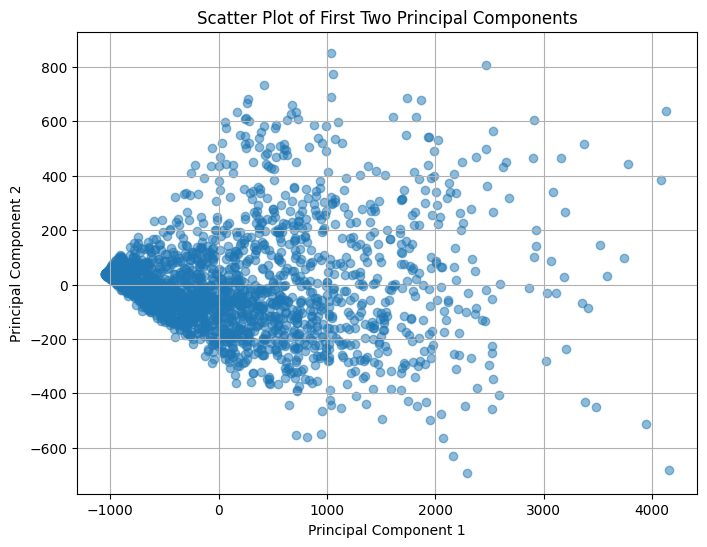

In [40]:

from sklearn.decomposition import PCA

# Assuming you have your dataset loaded into a variable 'X'

# Step 1: Perform PCA without scaling
# You can specify the number of components you want to keep
num_components = 2
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

# Step 2: Analyze explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)
print("Total variance explained by", num_components, "components:", np.sum(explained_variance_ratio))

# Step 3: (Optional) Visualize the results
import matplotlib.pyplot as plt

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.grid(True)
plt.show()

Training and testing the models

In [41]:
X_train

,Age,MatchedPlayed,Starts,90s,Goals,Assists,GA,NonPenGoals,PensScored,PensAttempted,YellowCards,RedCards,xG,npxG,xAG,npxG + xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,G/90,A/90,GA/90,NonPenGoals/90,NonPenGA/90,xG/90,xAG/90,xA+xG /90,npxG/90,npXG + xAG /90,Shots,ShotsOnTarget,SoT%,S/90,SoT/90,G/Shot,G/SoT,AvgShotDist,FKShots,npxG/Shot,Goals - xG,npG - npxG,PassesCompleted,PassesAttempted,PercentPassesCompleted,ShortPassesCompleted,ShortPassesAttempted,ShortPassesPercentCompleted,MedPassesCompleted,MedPassesAttempted,MedPassesPercentCompleted,LongPassesCompleted,LongPassesAttempted,LongPassesPercentCompleted,xA,A - xAG,KeyPasses,1/3,PPen,CPen,Progressive Passes,Tackles,TacklesWon,TklsDefThird,TklsMidThird,TklsAttThird,DribblersTackled,DribblesChallenged,DrblTkl%,ChallengesLost,Blocks,BlockedShots,BlockedPasses,Interceptions,Tackles + Interceptions,Clearances,DefensiveErrors,nationality_id,team_id,position_id,season_id,MinutesPlayed_normalized,TotalPassingDistance_normalized,ProgressedPassingDistance_normalized
1036,36,31,7,10.1,0,1,1,0,0,0,2,0,0.4,0.4,0.9,1.3,21.0,70.0,78.0,0.00,0.10,0.10,0.00,0.10,0.04,0.09,0.13,0.04,0.13,7,1,14.3,0.69,0.10,0.00,0.00,17.9,0.0,0.06,-0.4,-0.4,563.0,727.0,77.4,261.0,291.0,89.7,238.0,279.0,85.3,52.0,112.0,46.4,1.6,0.1,13.0,61.0,15.0,5.0,70.0,26.0,16,11.0,11.0,4.0,15.0,34.0,44.1,19.0,14.0,2.0,12.0,12,38.0,15.0,0.0,2,15,8,4,0.266745,0.169480,0.126252
2205,33,20,13,12.5,2,2,4,2,0,0,1,0,2.2,2.2,2.0,4.2,21.0,14.0,62.0,0.16,0.16,0.32,0.16,0.32,0.18,0.16,0.33,0.18,0.33,20,7,35.0,1.59,0.56,0.10,0.29,16.9,0.0,0.11,-0.2,-0.2,180.0,262.0,68.7,120.0,151.0,79.5,39.0,68.0,57.4,4.0,14.0,28.6,1.7,0.0,15.0,7.0,7.0,2.0,14.0,13.0,6,8.0,4.0,1.0,8.0,27.0,29.6,19.0,8.0,1.0,7.0,9,22.0,7.0,0.0,2,12,2,4,0.329921,0.039136,0.019144
1173,26,35,35,34.3,3,4,7,3,0,0,8,0,1.5,1.5,5.3,6.8,52.0,196.0,67.0,0.09,0.12,0.20,0.09,0.20,0.04,0.15,0.20,0.04,0.20,43,16,37.2,1.25,0.47,0.07,0.19,25.1,0.0,0.04,1.5,1.5,1023.0,1365.0,74.9,394.0,464.0,84.9,416.0,515.0,80.8,187.0,318.0,58.8,5.3,-1.3,51.0,163.0,48.0,12.0,196.0,106.0,64,35.0,55.0,16.0,54.0,104.0,51.9,50.0,53.0,6.0,47.0,35,141.0,34.0,0.0,3,19,4,3,0.903481,0.357962,0.307784
1402,21,23,20,20.0,1,1,2,1,0,0,2,0,1.3,1.3,1.2,2.5,23.0,73.0,27.0,0.05,0.05,0.10,0.05,0.10,0.06,0.06,0.12,0.06,0.12,11,3,27.3,0.55,0.15,0.09,0.33,11.9,0.0,0.12,-0.3,-0.3,965.0,1163.0,83.0,444.0,495.0,89.7,456.0,508.0,89.8,51.0,117.0,43.6,0.5,-0.2,7.0,82.0,6.0,0.0,73.0,48.0,30,26.0,17.0,5.0,26.0,34.0,76.5,8.0,28.0,10.0,18.0,26,74.0,66.0,0.0,2,24,3,5,0.525300,0.279467,0.220338
507,31,7,3,2.9,0,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,2.0,11.0,1.0,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.06,0.06,4,0,0.0,1.38,0.00,0.00,0.00,21.4,0.0,0.04,-0.2,-0.2,98.0,120.0,81.7,44.0,54.0,81.5,37.0,42.0,88.1,12.0,14.0,85.7,0.1,0.0,0.0,8.0,2.0,0.0,11.0,11.0,6,2.0,7.0,2.0,3.0,6.0,50.0,3.0,3.0,0.0,3.0,8,19.0,2.0,0.0,2,4,4,2,0.076046,0.027433,0.016176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,30,8,6,6.2,0,0,0,0,0,0,1,0,0.7,0.7,0.0,0.7,1.0,12.0,3.0,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.11,0.11,0.11,5,3,60.0,0.80,0.48,0.00,0.00,11.6,0.0,0.13,-0.7,-0.7,213.0,271.0,78.6,101.0,110.0,91.8,89.0,106.0,84.0,18.0,43.0,41.9,0.0,0.0,0.0,11.0,0.0,0.0,12.0,8.0,5,4.0,1.0,3.0,3.0,7.0,42.9,4.0,6.0,2.0,4.0,4,12.0,27.0,1.0,45,12,3,1,0.163498,0.063296,0.056392
1095,24,1,0,0.1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,6.0,9.0,66.7,1.0,2.0,50.0,5.0,6.0,83.3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1.0,1.0,0.0,20,10,4,2,0.003217,0.001970,0.001521
1130,26,32,32,30.9,1,0,1,1,0,0,8,0,1.8,1.8,1.3,3.1,16.0,105.0,7.0

In [42]:
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [43]:
selected_features = [feature for feature, coef in zip(total_table_df.columns, lasso.coef_) if coef != 0]
print("Selected Features:", selected_features)

Selected Features: ['market_value_in_eur', 'Age', 'MatchedPlayed', 'Starts', '90s', 'Goals', 'Assists', 'GA', 'NonPenGoals', 'PensScored', 'PensAttempted', 'YellowCards', 'RedCards', 'xG', 'npxG', 'xAG', 'npxG + xAG', 'ProgressiveCarries', 'ProgressivePasses', 'ProgressivePassesReceived', 'G/90', 'A/90', 'GA/90', 'NonPenGoals/90', 'NonPenGA/90', 'xG/90', 'xAG/90', 'xA+xG /90', 'npxG/90', 'npXG + xAG /90', 'Shots', 'ShotsOnTarget', 'SoT%', 'S/90', 'SoT/90', 'G/Shot', 'G/SoT', 'AvgShotDist', 'FKShots', 'npxG/Shot', 'Goals - xG', 'npG - npxG', 'PassesCompleted', 'PassesAttempted', 'PercentPassesCompleted', 'ShortPassesCompleted', 'ShortPassesAttempted', 'ShortPassesPercentCompleted', 'MedPassesCompleted', 'MedPassesAttempted', 'MedPassesPercentCompleted', 'LongPassesCompleted', 'LongPassesAttempted', 'LongPassesPercentCompleted', 'xA', 'A - xAG', 'KeyPasses', '1/3', 'PPen', 'CPen', 'Progressive Passes', 'Tackles', 'TacklesWon', 'TklsDefThird', 'TklsMidThird', 'TklsAttThird', 'DribblersTac

In [44]:
print("Lasso Coefficients:")
for feature, coef in zip(total_table_df.columns, lasso.coef_):
    print(feature, ":", coef)

Lasso Coefficients:
market_value_in_eur : -1011579.6266946951
Age : -463362.50556629756
MatchedPlayed : 288376.78703386674
Starts : 53887.681024208636
90s : 3293683.410304801
Goals : -2528011.1585780224
Assists : 426299.40936353314
GA : 290269.7051951486
NonPenGoals : 1390547.0786900378
PensScored : -3208111.772593577
PensAttempted : 388703.01295213035
YellowCards : -858642.3303475496
RedCards : -1099138.6906695487
xG : -117563.43675552175
npxG : 3055680.6983662928
xAG : 452589.02856699616
npxG + xAG : 18853.786950497382
ProgressiveCarries : -5600.73485091748
ProgressivePasses : 16991.104648065706
ProgressivePassesReceived : -20198713.437362432
G/90 : 5083711.586600708
A/90 : -1333356.610175349
GA/90 : 27588941.295131005
NonPenGoals/90 : -3646052.83374252
NonPenGA/90 : 16658634.495749982
xG/90 : -23036759.27328711
xAG/90 : 12342112.582231099
xA+xG /90 : -40978779.814559646
npxG/90 : 10093163.690322146
npXG + xAG /90 : 41355.77843336381
Shots : -180345.06048162447
ShotsOnTarget : 10627.

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = lasso.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 8938000.701475425
Mean Squared Error: 157745901481091.75
Root Mean Squared Error: 12559693.526559148
R-squared: 0.5506400298258634


In [46]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [12095000.79349297 11952033.28029083 14529534.60097738 14389795.48346653
 13179281.07323523]
Mean RMSE: 13229129.046292588


**Trying to fit Linear regression**

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have your data loaded into variables X (features) and y (target variable)



# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 159248432418599.1
Mean Absolute Error: 8944059.391284825
R-squared: 0.5463598726178173
